In [3]:
import pandas as pd
import glob
from src.main.rl.evaluation.phase2_evaluation import create_evaluation_df_phase2
path_to_save="src/main/rl/evaluation/output/phase2_evaluation_results.csv"
pd.options.display.max_colwidth = 300
df = pd.DataFrame()
try:
    df = pd.read_csv(path_to_save)
except:
    pass
if df.empty:
    all_files = []
    for file in glob.glob("src/main/rl/models/*/*/*/*.zip", recursive=True):
        all_files.append(file)
    df = create_evaluation_df_phase2(path_to_save,all_files)
df

,Unnamed: 0,full_path,combination,scenario,alg,action_wrapper,obs_wrapper,automation_wrapper,cum_reward,criticality_score,total_timesteps
0,0,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06_1\best_model.zip,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption2Wrapper,ObservationOption1Wrapper,NaN,25.931429,25.771079,35
1,1,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06_10\best_model.zip,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption2Wrapper,ObservationOption1Wrapper,NaN,26.308573,41.685593,50
2,2,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06_2\best_model.zip,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption2Wrapper,ObservationOption1Wrapper,NaN,33.322857,51.333311,61
3,3,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06_3\best_model.zip,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption2Wrapper,ObservationOption1Wrapper,NaN,25.172857,26.104682,35
4,4,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06_4\best_model.zip,src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption2Wrapper_None_None_RewardOption2Wrapper_A2C_training_04_06,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption2Wrapper,ObservationOption1Wrapper,NaN,24.128567,41.372237,49
...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,src/main/rl/models\scenario3\training_04_06\scenario3_None_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06_5\best_model.zip,src/main/rl/models\scenario3\training_04_06\scenario3_None_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06,scenario3,<class 'stable_baselines3.ppo.ppo.PPO'>,ActionSpaceOption1Wrapper,ObservationOption5Wrapper,NPPAutomationWrapper,218.366060,198.836475,250
2396,2396,src/main/rl/models\scenario3\training_04_06\scenario3_None_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06_6\best_model.zip,src/main/rl/models\scenario3\training_04_06\scenario3_None_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06,scenario3,<class 'stable_baselines3.ppo.ppo.PPO'>,ActionSpaceOption1Wrapper,ObservationOption5Wrapper,NPPAutomationWrapper,222.755870,201.358842,250
2397,2397,src/main/rl/models\scenario3\training_04_06\scenario3_None_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06_7\best_model.zip,src/main/rl/models\scenario3\training_04_06\scenario3_None_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06,scenario3,<class 'stable_baselines3.ppo.ppo.PPO'>,ActionSpaceOption1Wrapper,ObservationOption5Wrapper,NPPAutomationWrapper,221.634310,205.420834,250
2398,2398,src/main/rl/models\scenario3\training_04_06\scenario3_None_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06_8\best_model.zip,src/main/rl/models\scenario3\training_04_06\scenario3_None_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06,scenario3,<class 'stable_baselines3.ppo.

In [4]:
df_wo_automation = df.query("automation_wrapper.isna() == True")
df_w_automation = df[df["automation_wrapper"] == "NPPAutomationWrapper"]

In [5]:
from scipy.stats import iqr

statistics_wo = (
    df_wo_automation.set_index("full_path")
        .groupby("combination")
        .agg(
        return_mean=("cum_reward", "mean"),
        return_max=("cum_reward", "max"),
        return_std=("cum_reward", "std"),
        return_iqr=("cum_reward", iqr),
        timesteps_min=("total_timesteps", "min"),
        criticality_score_max=("criticality_score", "max"),
        criticality_score_std=("criticality_score", "std"),
        criticality_score__iqr=("criticality_score", iqr),
        scenario=("scenario", "first"),
        alg=("alg", "first"),
        action_wrapper=("action_wrapper", "first"),
        obs_wrapper=("obs_wrapper", "first"),
        automation_wrapper=("automation_wrapper", "first"),
    )
)

statistics_w = (
    df_w_automation.set_index("full_path")
        .groupby("combination")
        .agg(
        return_mean=("cum_reward", "mean"),
        return_max=("cum_reward", "max"),
        return_std=("cum_reward", "std"),
        return_iqr=("cum_reward", iqr),
        timesteps_min=("total_timesteps", "min"),
        criticality_score_max=("criticality_score", "max"),
        criticality_score_std=("criticality_score", "std"),
        criticality_score__iqr=("criticality_score", iqr),
        scenario=("scenario", "first"),
        alg=("alg", "first"),
        action_wrapper=("action_wrapper", "first"),
        obs_wrapper=("obs_wrapper", "first"),
        automation_wrapper=("automation_wrapper", "first"),
    )
)
assert len(statistics_wo)==120
assert len(statistics_w)==120

statistics_wo.merge(statistics_w, how="outer").sort_values("return_mean")

C:\Users\Niklas\Desktop\npp-RL\.venv\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,return_mean,return_max,return_std,return_iqr,timesteps_min,criticality_score_max,criticality_score_std,criticality_score__iqr,scenario,alg,action_wrapper,obs_wrapper,automation_wrapper
144,7.881145,25.075722,8.074289,2.691440,20,205.141124,56.648350,0.923652,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption3Wrapper,ObservationOption2Wrapper,NPPAutomationWrapper
74,10.797719,20.624346,3.835441,2.109289,50,159.748877,36.446096,10.129879,scenario2,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption3Wrapper,ObservationOption3Wrapper,NaN
101,11.176429,13.967145,1.237291,1.264284,33,40.322247,4.251463,5.507988,scenario3,<class 'stable_baselines3.ppo.ppo.PPO'>,ActionSpaceOption3Wrapper,ObservationOption1Wrapper,NaN
24,14.372286,60.708584,17.394580,13.531072,35,124.153623,36.604803,44.445392,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption3Wrapper,ObservationOption2Wrapper,NaN
102,14.747571,17.888570,1.664784,2.171073,41,70.368976,11.766165,9.390520,scenario3,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption3Wrapper,ObservationOption2Wrapper,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,237.456785,242.719590,1.930037,0.862392,250,209.177932,14.780044,17.202966,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption2Wrapper,ObservationOption4Wrapper,NPPAutomationWrapper
55,237.635087,244.957210,5.693993,5.066493,250,218.359521,24.121750,22.174350,scenario1,<class 'stable_baselines3.td3.td3.TD3'>,ActionSpaceOption1Wrapper,ObservationOption4Wrapper,NaN
176,240.022871,244.816900,3.794193,6.504380,250,216.778182,20.327282,32.734640,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption1Wrapper,ObservationOption5Wrapper,NPPAutomationWrapper
172,240.237332,244.905030,4.104658,7.520238,250,212.485323,15.783924,15.895291,scenario1,<class 'stable_baselines3.a2c.a2c.A2C'>,ActionSpaceOption1Wrapper,ObservationOption4Wrapper,NPPAutomationWrapper


C:\Users\Niklas\Desktop\npp-RL\.venv\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


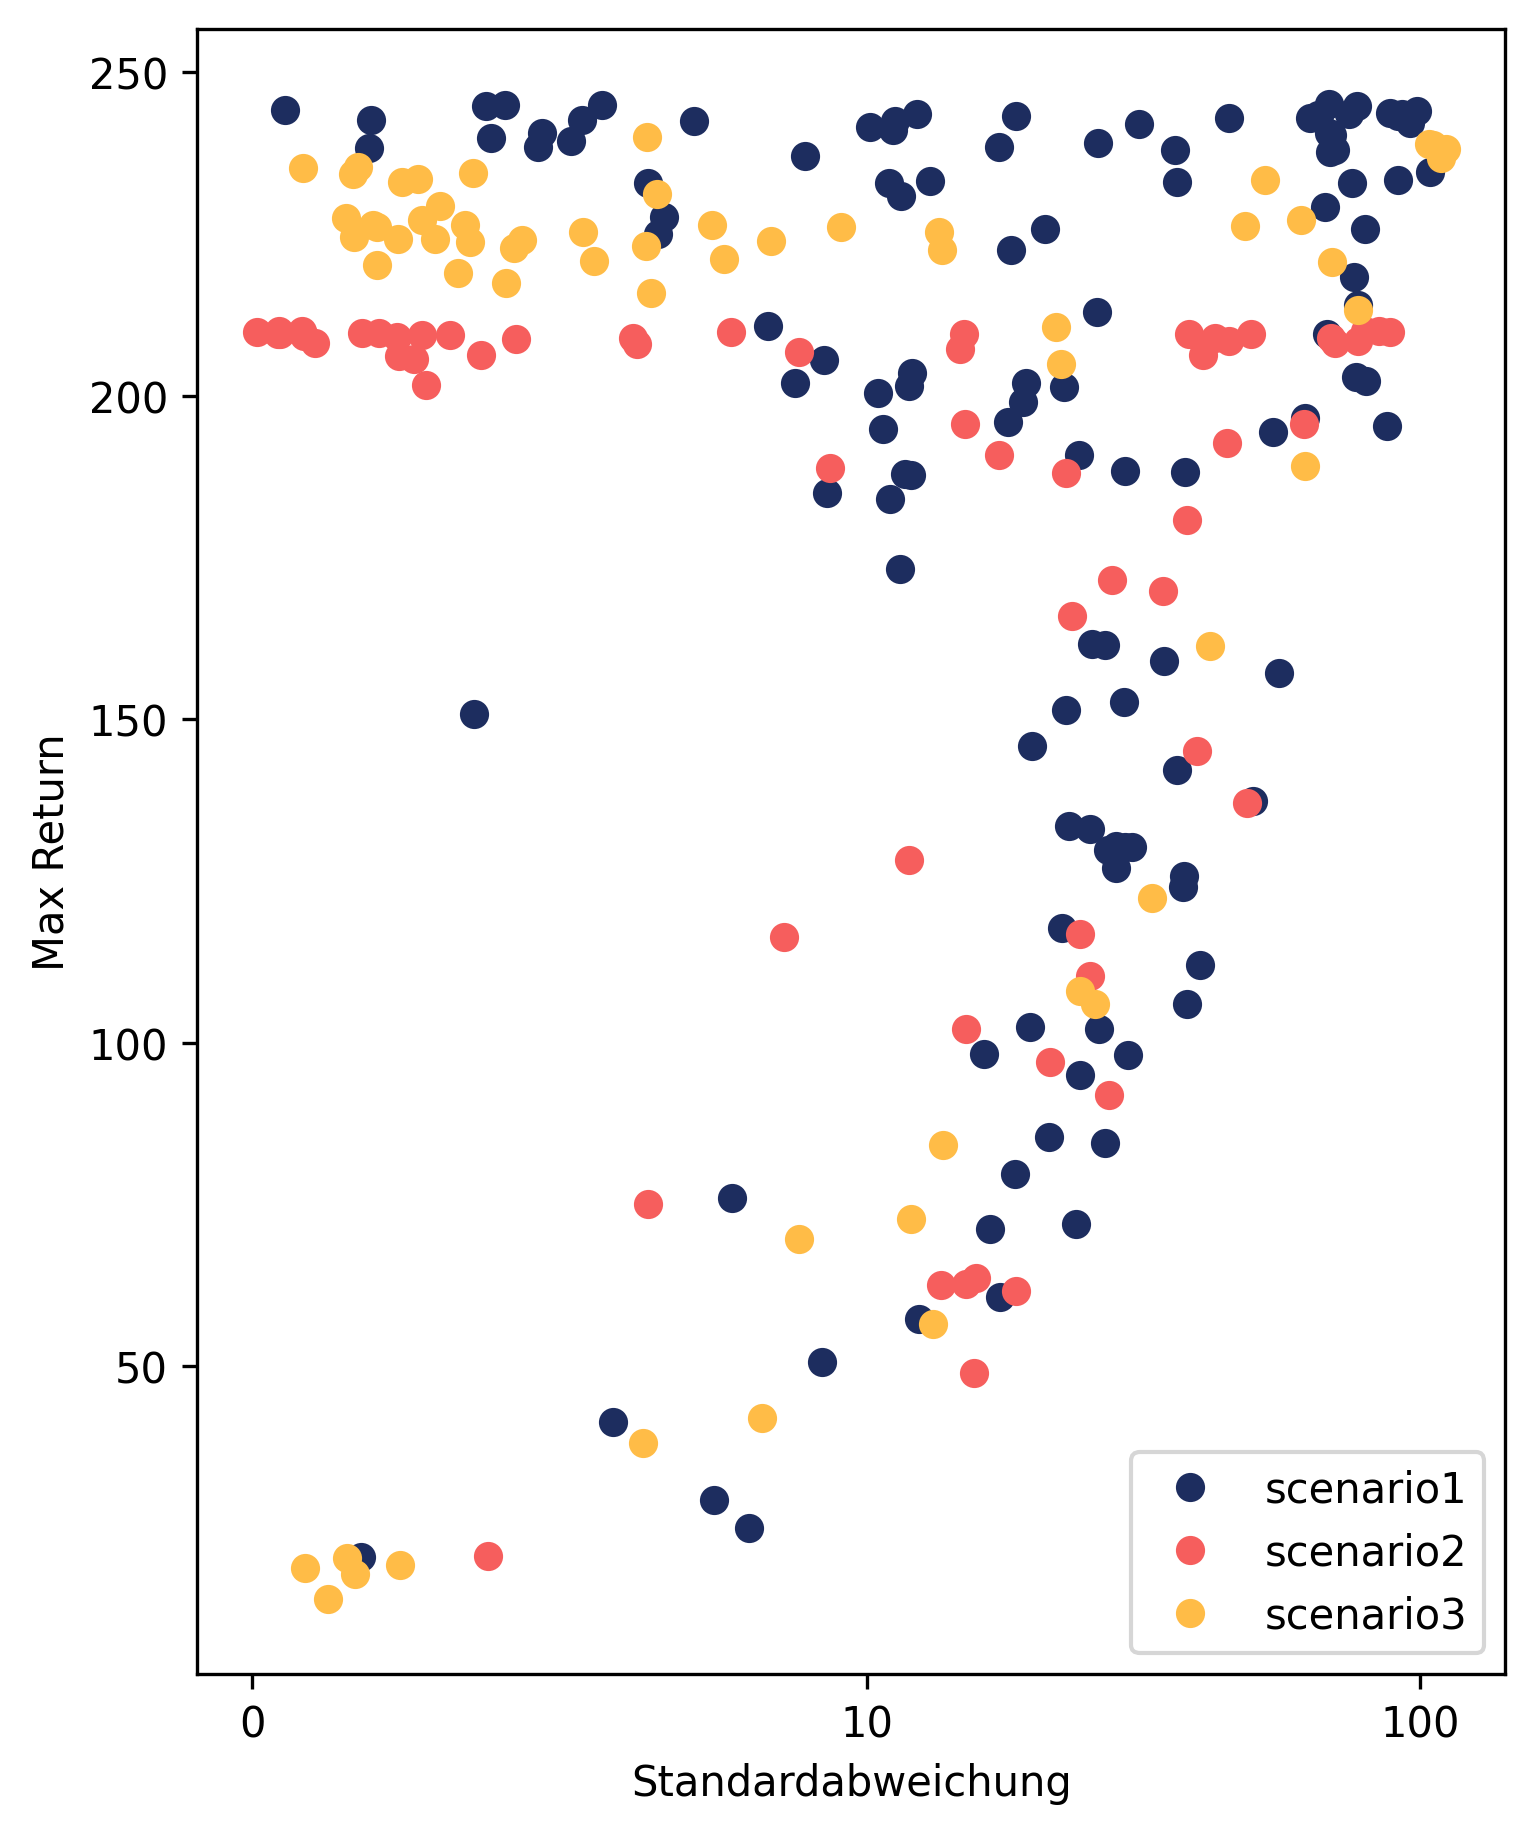

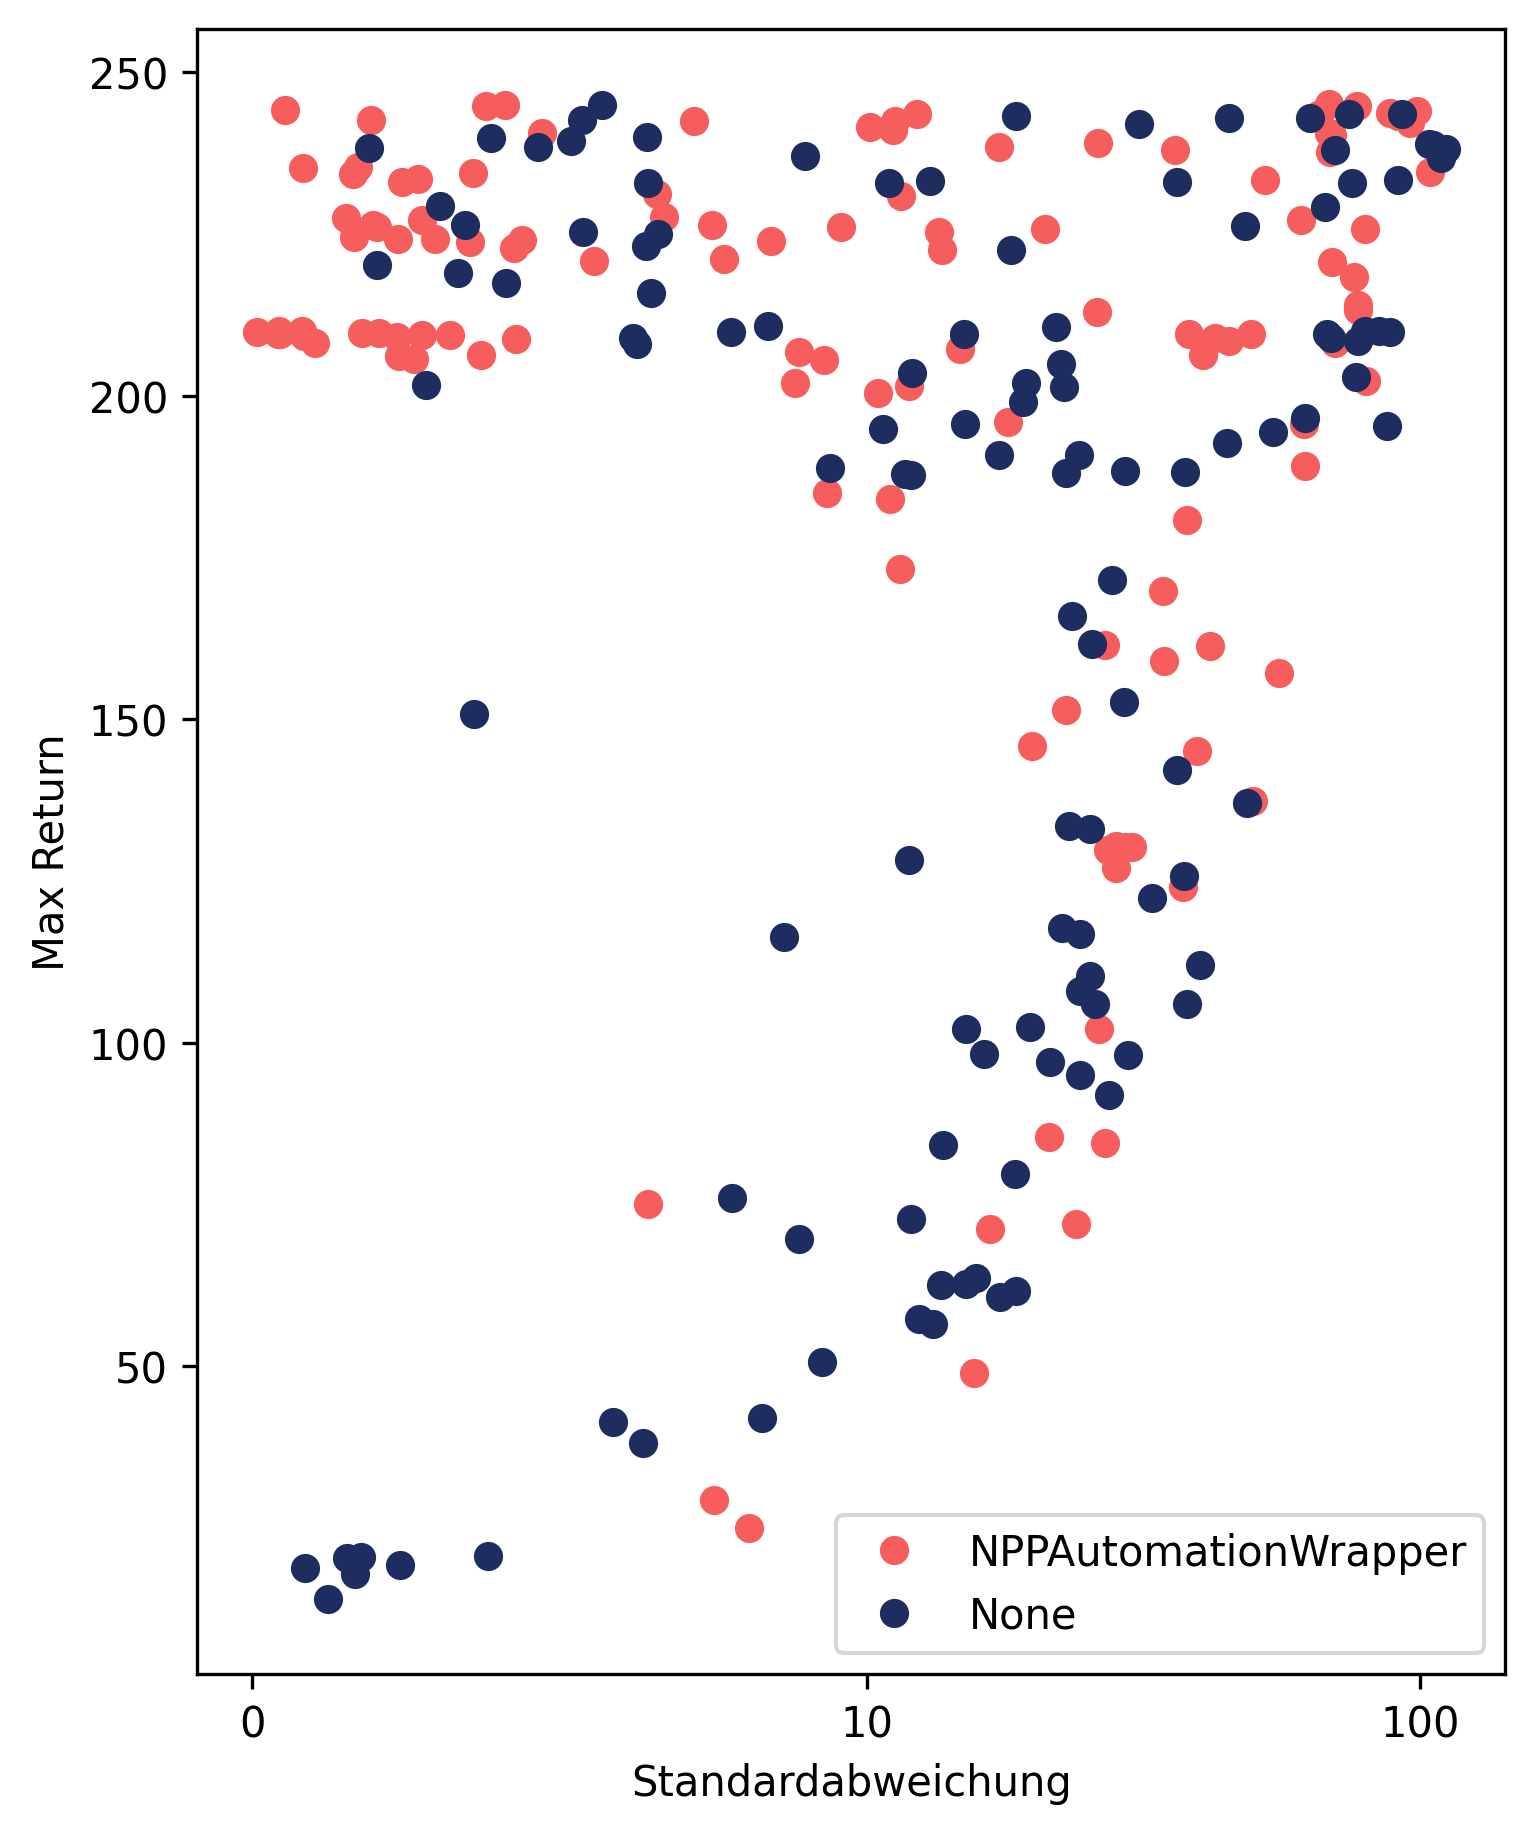

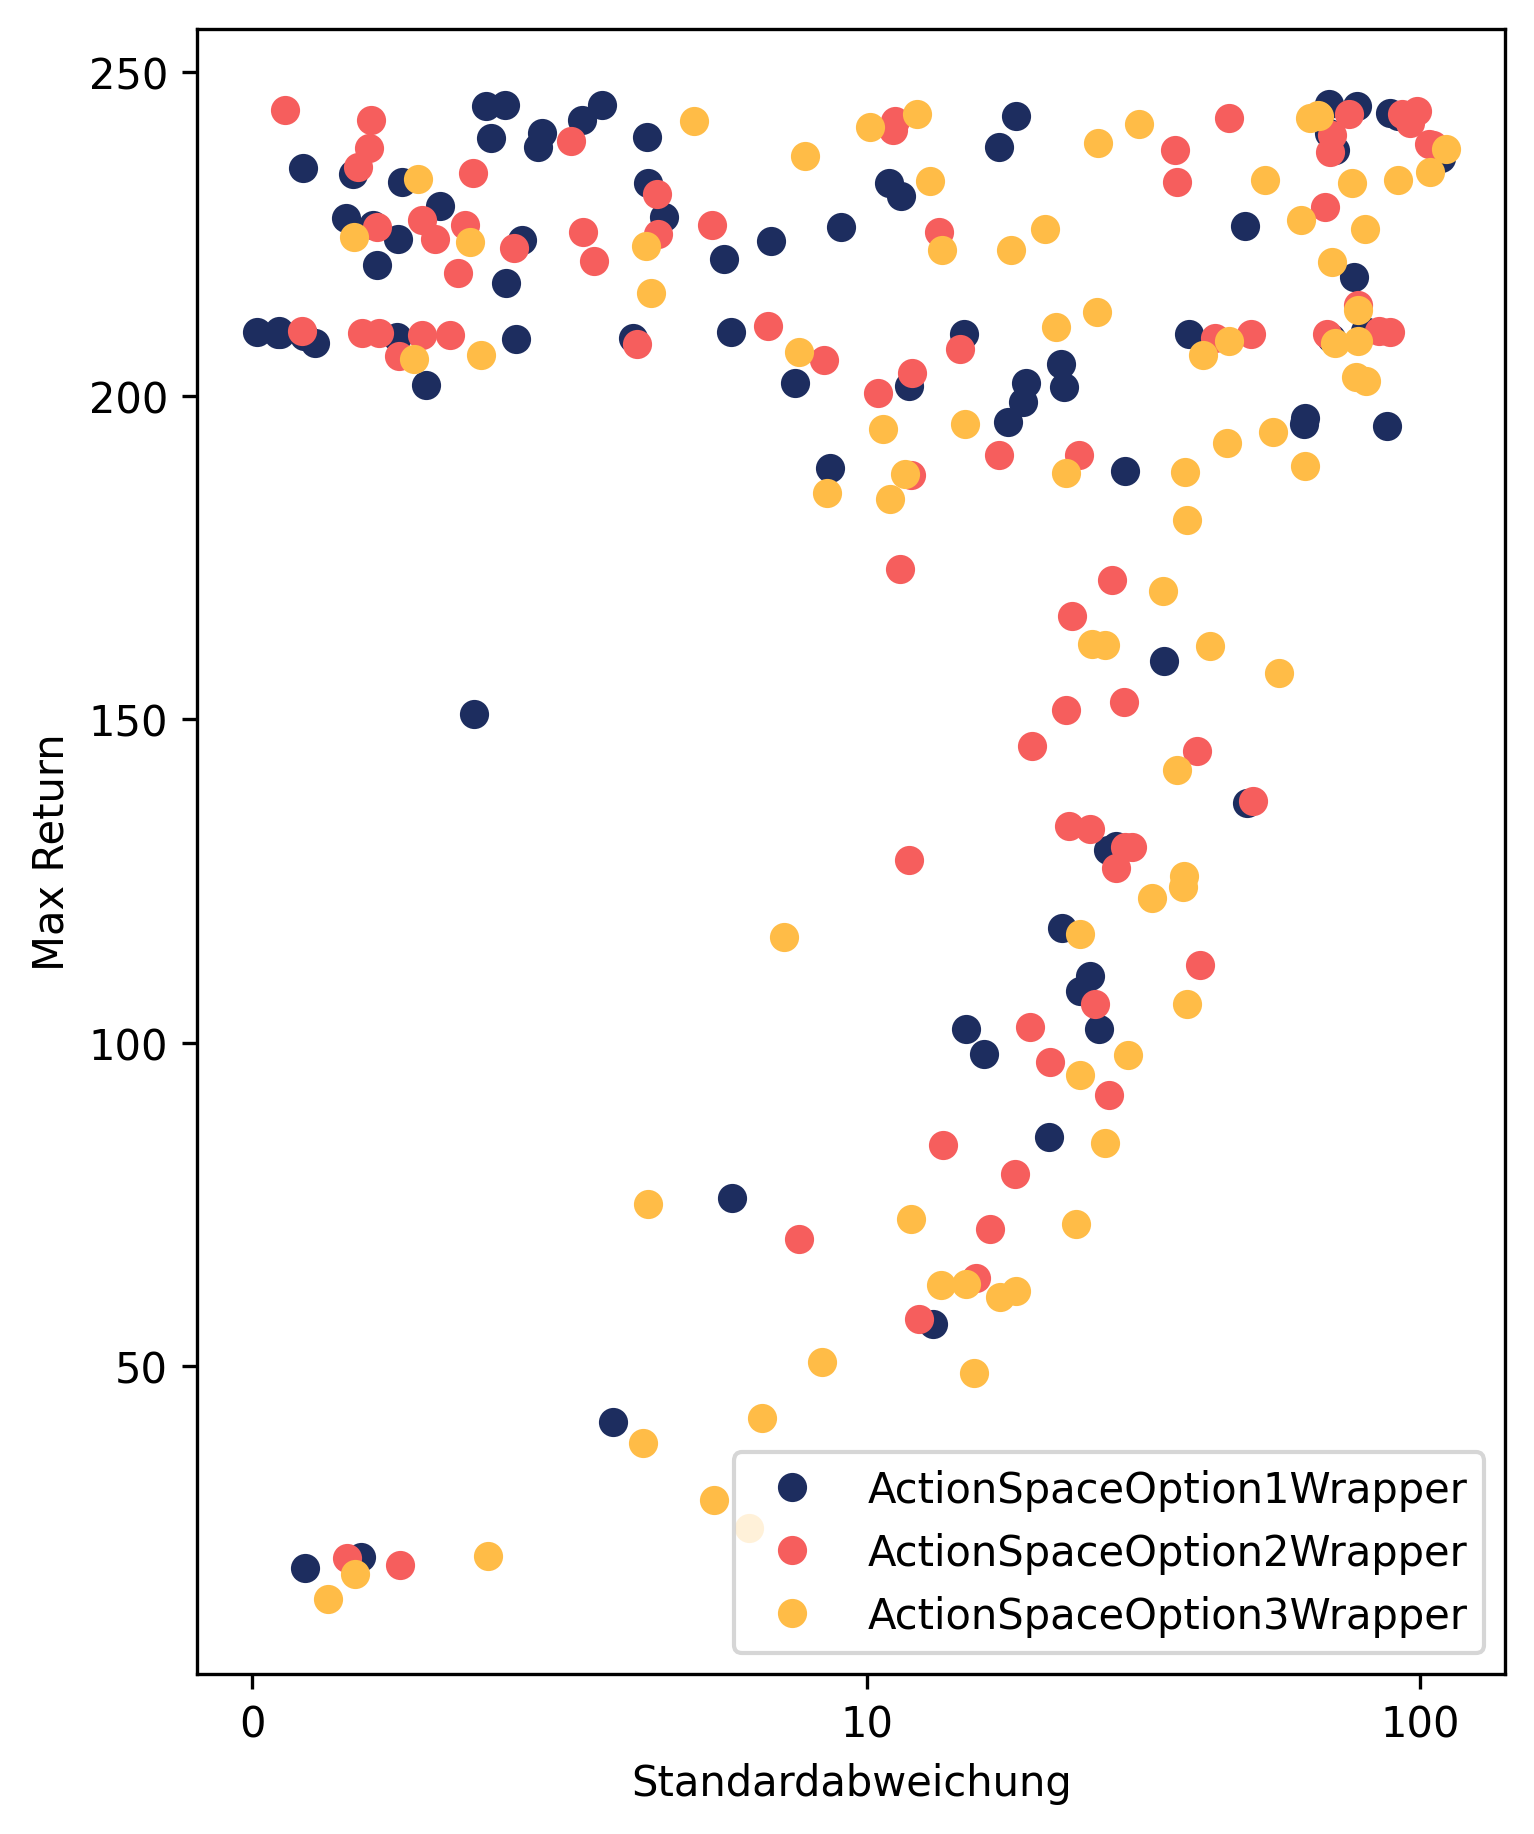

In [8]:
from src.main.rl.evaluation.plots.phase2_plots import create_multi_object_plot, create_phase_2_counts_plots

figures=create_multi_object_plot(statistics_wo.merge(statistics_w, how="outer"))
for idx,fig in enumerate(figures):
    fig.savefig(
        f"src/main/rl/evaluation/plot_results/phase2_summary_plots{idx}.png",
        format="png",
        dpi=300,
    )


In [9]:
paths_that_fulfil_condition_wo_automation = statistics_wo.query(
    "return_max>200 and return_std<15 and timesteps_min==250 "
)
len(paths_that_fulfil_condition_wo_automation)

26

In [10]:
paths_that_fulfil_condition_w_automation = statistics_w.query(
    "return_max>200 and return_std<15 and timesteps_min==250"
)
len(paths_that_fulfil_condition_w_automation)

55

C:\Users\Niklas\Desktop\npp-RL\.venv\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


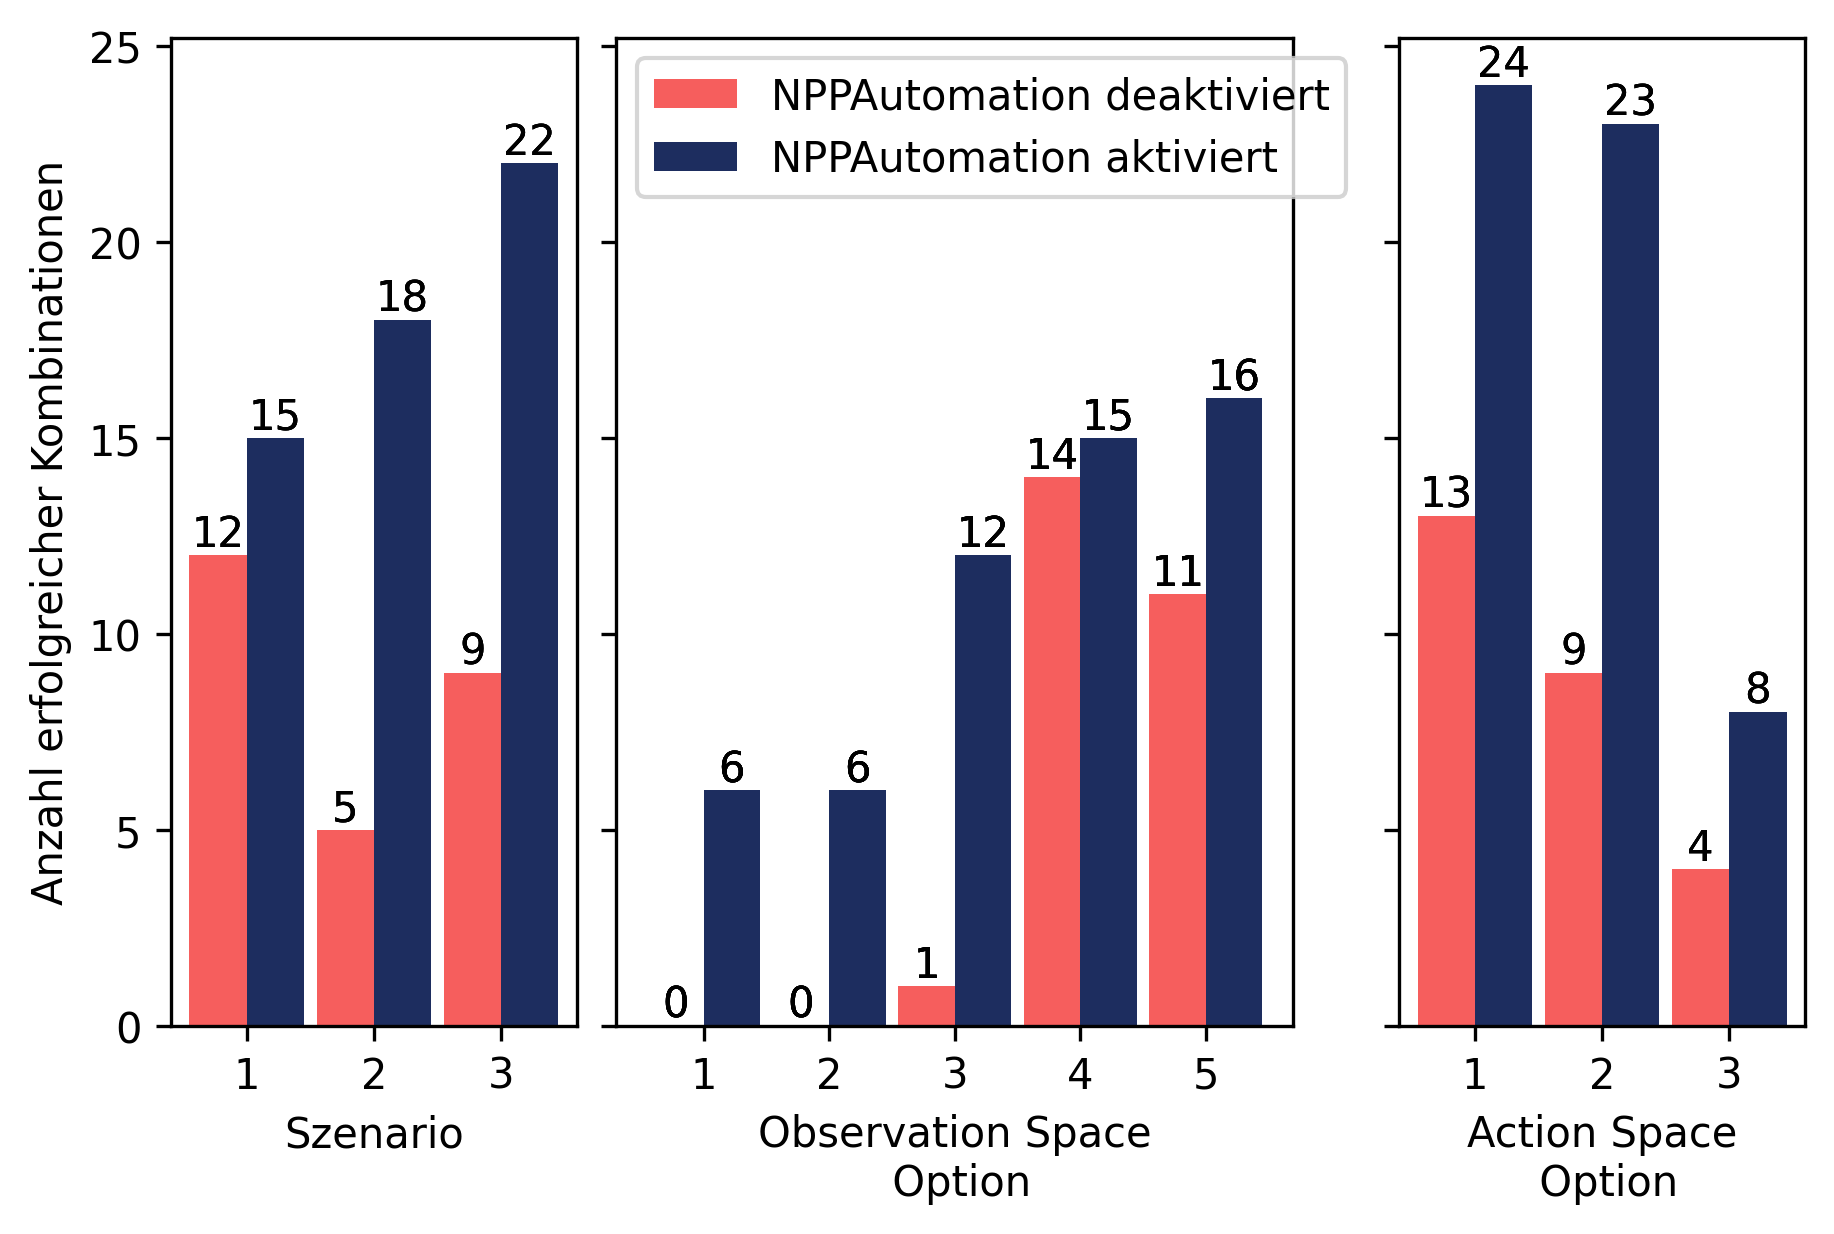

In [12]:
from src.main.rl.evaluation.plots.phase2_plots import create_multi_object_plot, create_phase_2_counts_plots

fig=create_phase_2_counts_plots(
        paths_that_fulfil_condition_wo_automation.merge(paths_that_fulfil_condition_w_automation, how="outer")
    )
fig.savefig(
        f"src/main/rl/evaluation/plot_results/phase2_count_plots_new.png",
        format="png",
        dpi=300,
    )

In [ ]:
for item in ["obs_wrapper", "scenario", "action_wrapper", "alg"]:
    df_special = (
        df.groupby(item)
            .agg(
                return_mean=("cum_reward", "mean"),
                return_max=("cum_reward", "max"),
                return_std=("cum_reward", "std"),
                return_iqr=("cum_reward", iqr),
            )
            .round(2)
        )
    print(df_special)
#print(df_special.to_latex())

In [ ]:
highest_return_wo_automation = df_wo_automation.query("cum_reward == cum_reward.max()")
print(highest_return_wo_automation["cum_reward"])
highest_return_w_automation = df_w_automation.query("cum_reward == cum_reward.max()")
print(highest_return_w_automation["cum_reward"])

In [13]:
cols_to_count = ["alg", "scenario", "action_wrapper", "obs_wrapper", "automation_wrapper"]
statistics_wo_value_counts = pd.Series()
statistics_w_value_counts = pd.Series()
for col in cols_to_count:
    statistics_wo_value_counts = pd.concat(
        [statistics_wo_value_counts, paths_that_fulfil_condition_wo_automation[col].value_counts()]
    )
    statistics_w_value_counts = pd.concat(
        [statistics_w_value_counts, paths_that_fulfil_condition_w_automation[col].value_counts()]
    )
print(statistics_wo_value_counts)
print(statistics_w_value_counts)

<class 'stable_baselines3.ppo.ppo.PPO'>    11
<class 'stable_baselines3.a2c.a2c.A2C'>     9
<class 'stable_baselines3.sac.sac.SAC'>     4
<class 'stable_baselines3.td3.td3.TD3'>     2
scenario1                                  12
scenario3                                   9
scenario2                                   5
ActionSpaceOption1Wrapper                  13
ActionSpaceOption2Wrapper                   9
ActionSpaceOption3Wrapper                   4
ObservationOption4Wrapper                  14
ObservationOption5Wrapper                  11
ObservationOption3Wrapper                   1
dtype: int64
<class 'stable_baselines3.ppo.ppo.PPO'>    29
<class 'stable_baselines3.a2c.a2c.A2C'>    18
<class 'stable_baselines3.sac.sac.SAC'>     6
<class 'stable_baselines3.td3.td3.TD3'>     2
scenario3                                  22
scenario2                                  18
scenario1                                  15
ActionSpaceOption1Wrapper                  24
ActionSpaceOption2Wra

C:\Users\Niklas\AppData\Local\Temp\ipykernel_2876\2629601980.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  statistics_wo_value_counts = pd.Series()
C:\Users\Niklas\AppData\Local\Temp\ipykernel_2876\2629601980.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  statistics_w_value_counts = pd.Series()


In [15]:
wo_automation_scenario1_action_space3 = paths_that_fulfil_condition_wo_automation.query(
    "scenario=='scenario1' and action_wrapper=='ActionSpaceOption3Wrapper' and timesteps_min==250"
)
wo_automation_scenario2_action_space3 = paths_that_fulfil_condition_wo_automation.query(
    "scenario=='scenario2' and action_wrapper=='ActionSpaceOption3Wrapper' and timesteps_min==250"
)
wo_automation_scenario3_action_space3 = paths_that_fulfil_condition_wo_automation.query(
    "scenario=='scenario3' and action_wrapper=='ActionSpaceOption3Wrapper' and timesteps_min==250"
)
w_automation_scenario1_action_space3 = paths_that_fulfil_condition_w_automation.query(
    "scenario=='scenario1' and action_wrapper=='ActionSpaceOption3Wrapper' and timesteps_min==250"
)
w_automation_scenario2_action_space3 = paths_that_fulfil_condition_w_automation.query(
    "scenario=='scenario2' and action_wrapper=='ActionSpaceOption3Wrapper' and timesteps_min==250"
)
w_automation_scenario3_action_space3 = paths_that_fulfil_condition_w_automation.query(
    "scenario=='scenario3' and action_wrapper=='ActionSpaceOption3Wrapper' and timesteps_min==250"
)
print(f"Only ActionSpace3 and scenario1 without automation:\n {wo_automation_scenario1_action_space3[['return_max', 'return_mean']]}")
print(f"Only ActionSpace3 and scenario2 without automation:\n {wo_automation_scenario2_action_space3[['return_max', 'return_mean']]}")
print(f"Only ActionSpace3 and scenario3 without automation:\n {wo_automation_scenario3_action_space3[['return_max', 'return_mean']]}")
print(f"Only ActionSpace3 and scenario1 with automation:\n {w_automation_scenario1_action_space3[['return_max', 'return_mean', ]]}")
print( f"Only ActionSpace3 and scenario2 with automation:\n {w_automation_scenario2_action_space3[['return_max', 'return_mean', ]]}")
print( f"Only ActionSpace3 and scenario3 with automation:\n {w_automation_scenario3_action_space3[['return_max', 'return_mean', ]]}")

Only ActionSpace3 and scenario1 without automation:
                                                                                                                                                         return_max  \
combination                                                                                                                                                          
src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption3Wrapper_ObservationOption4Wrapper_None_RewardOption2Wrapper_TD3_training_04_06   237.15456   
src/main/rl/models\scenario1\training_04_06\scenario1_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_None_RewardOption2Wrapper_SAC_training_04_06   233.18958   

                                                                                                                                                        return_mean  
combination                                                                                                         